# VIRUS-W explorer: Examples

In order to run this notebook, you should not even need to `pip install` the package, although I recommend doing so for more flexible usage and access to the shortcuts. See `README.md` for further information.

In [94]:
import vw_explorer as vwe

# Upon first running this, you are prompted to create a config file at ~/.vw_explorer/config.yml. This file contains paths to your data directories. You can modify it as needed, but might need to restart the jupyter kernel afterwards for the changes to take effect.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


After you have specified the **DATAPATH**, the path where you drop your **observations**, the path where you drop your **guider frames**, and the **output path**, within the `config.yml`, you are ready to process your log file. 

The initial processing does not require the existence of any observation or guider fits frames, but it is beneficial if they already do exist as the log information will be supplemented with information from the observation fits headers.

In [95]:
vwe.CONFIG.set_to_example_dirs()  # Only do this for demonstration purposes
# Otherwise, you may also set config paths dynamically like this:
# vwe.CONFIG.data_dir = Path("/path/to/data_dir")
vwe.CONFIG.count_available_files()


[10:55:29 vw-explorer: INFO] - Data directory updated to: C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data
[10:55:29 vw-explorer: INFO] - Output directory updated to: C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data
[10:55:29 vw-explorer: INFO] - Observations directory updated to: C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\observations
[10:55:29 vw-explorer: INFO] - Guider directory updated to: C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\guider_frames


{'observations': 0, 'guider frames': 7}

## Parsing the log

Parsing the current log file is as easy as running `load_observations`.

This will:

- Look for the `log.txt` file in your data directory
- Save a `log_sanitized.txt` file with only the rows considered in further steps.
- Save an `observations_raw.csv` file in the ``CONFIG.output_dir`` that contain those parsed log lines in csv format.
- Save a `dither_chunks.csv` file that contains information on (science target) dither chunks inferred from the log.

In [96]:
logfile_path = None  # You may specify your log file path here. Otherwise it will look for a `log.txt` file in your DATAPATH.
observations = vwe.load_observations(logfile_path, force_log_reload=True)  # List of Observation objects
obs_df = vwe.load_obs_dataframe()  # DataFrame of observations
dc_df = vwe.load_dither_chunk_dataframe()  # DataFrame of dither chunks


[10:55:29 vw-explorer: INFO] - No log file provided, using default at C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\log.txt
[10:55:29 vw-explorer: INFO] - Filtered log lines: 14 out of 47 kept.
[10:55:29 vw-explorer: INFO] - Please check whether sanitized logfile saved to C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\log_sanitized.txt looks as expected.
[10:55:29 vw-explorer: INFO] - Saved parsed 58 observations to backup CSV at C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\observations_raw.csv.


c:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\vw_explorer\classes\dither_chunk.py:56: RuntimeWarning: Mean of empty slice
  mean_x, mean_y = np.nanmean(fid_coords, axis=0)


[10:55:29 vw-explorer: INFO] - Saved 7 dither chunks to backup CSV at C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\dither_chunks.csv.


You may then inspect the data frames:


In [97]:
obs_df.tail(2)


,airmass_noted,comments,dither,exptime,fiducial_x,fiducial_y,filename,focus,fpath,fpath_available,fwhm_noted,start_time_ut,target
56,1.45,NaN,5,120.0,345.9,172.2,vw001483,63292.0,vw001483.fits,False,1.8,2025-11-16 06:27:54,M52
57,1.45,NaN,6,120.0,345.9,178.0,vw001484,63292.0,vw001484.fits,False,1.8,2025-11-16 06:31:24,M52


In [98]:
dc_df.head(2)


,chunk_index,end_time_ut,fid_x_mean,fid_y_mean,is_calibration_obs,num_observations,observation_names,observation_paths,start_time_ut,target
0,0,2025-11-16 06:31:24,344.0,175.033333,False,6,"[vw001479, vw001480, vw001481, vw001482, vw001...","[vw001479.fits, vw001480.fits, vw001481.fits, ...",2025-11-16 06:13:54,M52
1,0,2025-11-16 03:22:17,324.3,314.650000,False,6,"[vw001466, vw001467, vw001468, vw001469, vw001...","[vw001466.fits, vw001467.fits, vw001468.fits, ...",2025-11-16 01:35:58,NGC7465


## Creating a guider index, inspecting GuiderFrames and DitherChunks

For demonstration purposes, I have included a few guider fits frames within the `example_data` directory (not too many to save data).

We can thus process the observations, which will first create a guider index (mapping guider file names and snapshot times) and then load dither chunks.

Guider index creation does not have to be done explicitly, it is automatically done whenever a dither chunk is looked up.


In [99]:
vwe.create_guider_index(force_reload=True)  # Create or reload the guider index
gi_df = vwe.load_guider_index()  # If you want to inspect the guider index DataFrame
print(f"There are {len(dc_df)} dither chunks. For M52 we found {len(dc_df[dc_df['target']=='M52'])} dither chunk(s).")


[10:55:29 vw-explorer: INFO] - Guider index creation: Found 7 new files to index in C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\guider_frames
[10:55:29 vw-explorer: INFO] - Wrote 7 rows to C:\Users\fabia\OneDrive\Dokumente\Doktor\Work\Codes\other_people\hjs_seeing\example_data\guider_frames\guider_index.csv
There are 7 dither chunks. For M52 we found 1 dither chunk(s).


In [100]:
dc = vwe.load_dither_chunk("M52", 0)  # Load first dither chunk of M52
print(dc.get_summary().strip("\n"))


Summary:
  Target: M52
  Time Range:
    2025-11-16 06:13:54 to
    2025-11-16 06:31:24
  Total Observations: 6
  Number of Available Files: 0
  Number of Missing Files: 6
  Comments:


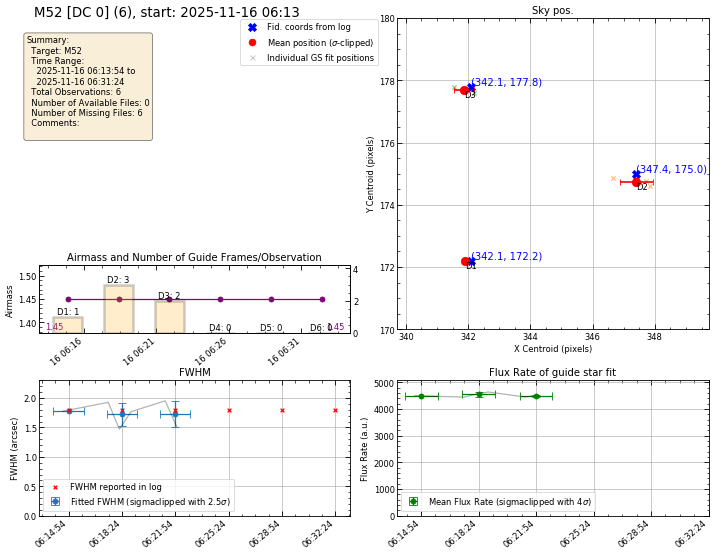

In [ ]:
dc.plot_summary()
# Reducing the dpi just within this notebook for smaller file size.
fig = plt.gcf()
fig.set_dpi(60)

# Missing guider frames for demonstration purposes


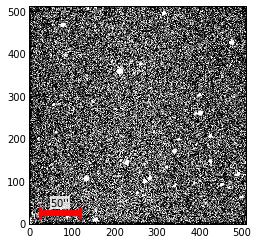

In [ ]:
# Take a look at individual guider sequences:
gseqs = dc.obs_seq.get_guider_sequences()
gseqs[0].frames[0].plot()


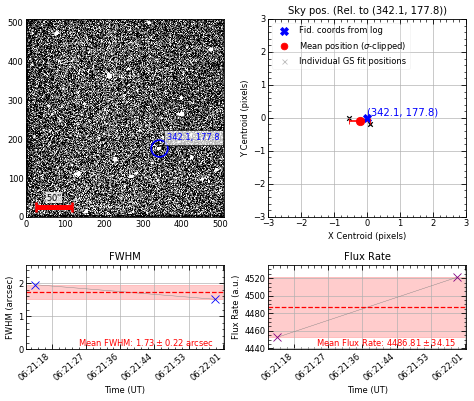

In [ ]:
fig = gseqs[2].plot_summary()  # Plot a guider sequence of the dither chunk
fig.set_dpi(60)
fig.set_facecolor("white")
